# <p style="background-color:#DC143C;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Stacked LSTM Google Stock Prediction</p>

<img src="https://s3.amazonaws.com/re-work-production/post_images/350/Untitled_design_%2838%29/original.png?1531900225">


<p style="background-color:#DC143C;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Table Of Contents</p>   
    
* [1. Importing Modules](#1)
    
* [2. Loading Data](#2)
    
* [3. Data PreProcessing ](#3)
       
* [4. Modelling With LSTM And Tuning The Hyperparameters ](#4)
    
* [5. Results And Conclusion](#5)

<a id="1"></a>

# <p style="background-color:#DC143C;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Importing Modules</p>

In [33]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,LSTM
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch


<a id="2"></a>

# <p style="background-color:#DC143C;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Loading Data</p>

In [34]:
df_train = pd.read_csv("../input/gooogle-stock-price/Google_Stock_Price_Train.csv")


In [ ]:
df_train

<a id="3"></a>

# <p style="background-color:#DC143C;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Data Preprocessing</p>

In [35]:
df_closing = df_train['Close'].apply(lambda x : x.replace(',', '')).astype('float')
df_closing.head()

0    663.59
1    666.45
2    657.21
3    648.24
4    620.76
Name: Close, dtype: float64

In [ ]:

plt.plot(df_closing.values);
plt.title("Closing prices for the data");


In [36]:
# Scaling The Data
scaler=MinMaxScaler(feature_range=(0,1))
df_closing=scaler.fit_transform(np.array(df_closing).reshape(-1,1))

In [37]:
def create_dataset(dataset, time_step=1):
    x_data, y_data = [], []
    
    for i in range(len(dataset)-time_step-1):
        x_data.append(dataset[i:(i+time_step), 0])
        y_data.append(dataset[i + time_step, 0])
    return np.array(x_data), np.array(y_data)

In [38]:
# Preparing train and test data

training_size=int(len(df_closing)*0.65)
test_size=len(df_closing)-training_size
train_data,test_data=df_closing[0:training_size,:],df_closing[training_size:len(df_closing),:1]

In [39]:
#Taking data for past 100 days for next prediction
time_step = 100

X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [40]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

<a id="4"></a>

# <p style="background-color:#DC143C;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Modelling With LSTM And Tuning The Hyperparameters</p>

In [50]:
def build_model(hp):
    model = Sequential()
    model.add(layers.LSTM(units = hp.Choice('layer1_units', [10,20,30,40,50,60,70,80,90,100]),return_sequences=True,input_shape=(100,1)))
    
    for i in range(hp.Int('num_layers', 2, 15)):                        
        model.add(layers.LSTM(units =  hp.Int('units' + str(i), min_value=10, max_value=150, step=10), return_sequences=True))
    
    model.add(LSTM(units = hp.Choice('last_lstm_units', [50, 100, 150])))
    model.add(Dropout(rate = hp.Choice('rate', [0.3, 0.4, 0.5, 0.6, 0.7])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam' )
    return model


tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials= 5,
    executions_per_trial=3,
    directory='project', project_name = 'Stacked_LSTM_Stock_Prediction')

tuner.search_space_summary()

tuner.search(X_train, y_train,
             epochs= 5,
             validation_data=(X_test, ytest))

Trial 5 Complete [00h 05m 32s]
val_loss: 0.0016829525120556355

Best val_loss So Far: 0.0012292418008049328
Total elapsed time: 00h 27m 34s


In [52]:
tuner.results_summary()


Results summary
Results in project/Stacked_LSTM_Stock_Prediction
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
layer1_units: 70
num_layers: 2
units0: 20
units1: 80
rate: 0.6
last_lstm_units: 100
Score: 0.0012292418008049328
Trial summary
Hyperparameters:
layer1_units: 80
num_layers: 2
units0: 140
units1: 20
rate: 0.4
last_lstm_units: 50
Score: 0.0014470220388223727
Trial summary
Hyperparameters:
layer1_units: 100
num_layers: 6
units0: 20
units1: 100
rate: 0.7
last_lstm_units: 100
units2: 80
units3: 120
units4: 20
units5: 70
units6: 40
units7: 150
units8: 90
units9: 70
units10: 80
units11: 50
units12: 120
units13: 110
Score: 0.0016829525120556355
Trial summary
Hyperparameters:
layer1_units: 100
num_layers: 12
units0: 40
units1: 110
rate: 0.6
last_lstm_units: 150
units2: 70
units3: 60
units4: 90
units5: 70
units6: 80
units7: 110
units8: 130
units9: 20
units10: 30
units11: 140
units12: 50
units13: 100
Score: 0.0033563196969528994
Trial s

In [51]:
model=tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 70)           20160     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 20)           7280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           32320     
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               72400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 132,261
Trainable params: 132,261
Non-trainable params: 0
__________________________________________________

In [53]:
model_history = model.fit(X_train,y_train, epochs=100, validation_data=(X_test,ytest))

Epoch 1/100
23/23 [==============================] - 17s 431ms/step - loss: 0.0134 - val_loss: 0.0032
Epoch 2/100
23/23 [==============================] - 9s 373ms/step - loss: 0.0123 - val_loss: 9.7442e-04
Epoch 3/100
23/23 [==============================] - 8s 354ms/step - loss: 0.0128 - val_loss: 0.0013
Epoch 4/100
23/23 [==============================] - 8s 360ms/step - loss: 0.0107 - val_loss: 0.0027
Epoch 5/100
23/23 [==============================] - 8s 362ms/step - loss: 0.0131 - val_loss: 0.0012
Epoch 6/100
23/23 [==============================] - 9s 375ms/step - loss: 0.0112 - val_loss: 0.0014
Epoch 7/100
23/23 [==============================] - 8s 355ms/step - loss: 0.0104 - val_loss: 0.0018
Epoch 8/100
23/23 [==============================] - 8s 357ms/step - loss: 0.0100 - val_loss: 0.0017
Epoch 9/100
23/23 [==============================] - 8s 362ms/step - loss: 0.0093 - val_loss: 0.0016
Epoch 10/100
23/23 [==============================] - 9s 381ms/step - loss: 0.0108 - v

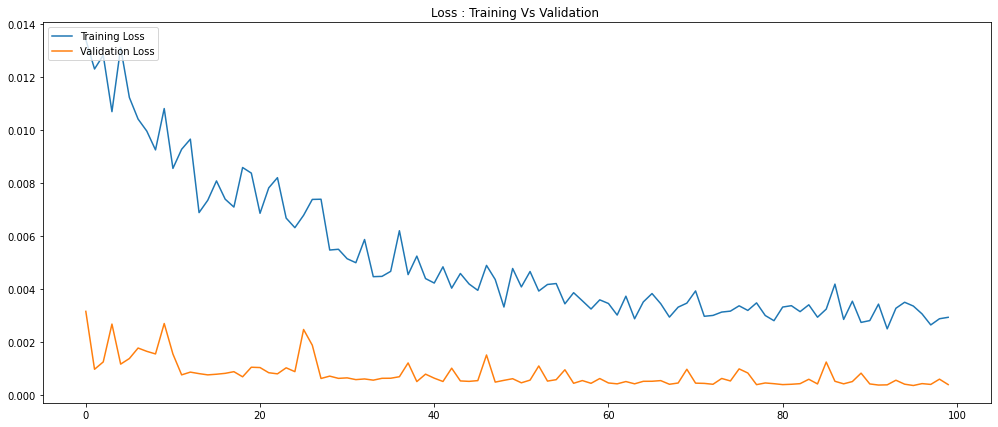

In [54]:
loss = model_history.history['loss']
validation_loss = model_history.history['val_loss']



plt.figure(figsize=(17, 7));
plt.plot(range(100), loss, label='Training Loss');
plt.plot(range(100), validation_loss, label='Validation Loss');
plt.legend(loc='upper left');
plt.title('Loss : Training Vs Validation ');

In [55]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [56]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

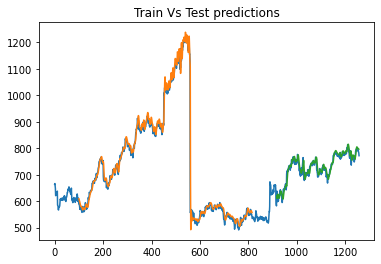

In [57]:
look_back=100
trainPredictPlot = np.empty_like(df_closing)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df_closing)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_closing)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df_closing))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Train Vs Test predictions');
plt.show()



# <p style="background-color:#DC143C;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Predictions For Next 10 Days</p>

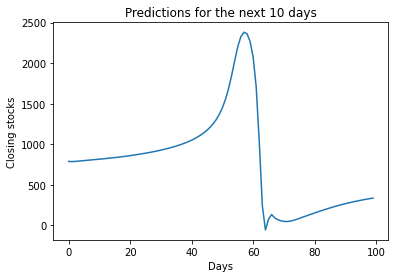

In [58]:
future_predictions = test_data.copy()
for i in range(100):
    new_prediction = model.predict(((future_predictions[341+i:])).reshape(1,100,1))
    future_predictions = np.append(future_predictions, new_prediction)
    
plt.plot(scaler.inverse_transform(future_predictions[441:].reshape(-1, 1)));
plt.title('Predictions for the next 10 days');
plt.xlabel('Days');
plt.ylabel('Closing stocks');


<a id="5"></a>

# <p style="background-color:#DC143C;font-family:newtimeroman;color:#000000;font-size:150%;text-align:center;border-radius:40px 40px;">Results And Conclusion</p>

In [59]:
print("Train RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Test RMSE: ", math.sqrt(mean_squared_error(ytest,test_predict)))


Train RMSE:  772.060016780815
Test RMSE:  734.1198356359321


# The model is performing pretty well, train and test MSE are close.